# Anomaly Detection 

## Introduction
* Anomaly Detection system has been a important component in almost every domain/sector where it is used to detect the anomalies (which are different in nature). It is mostly used in finance, retail and medical domain. 
* Unfortunately, due to the huge volume of data, coding the rules by security experts becomes difficult and time-consuming. 
* Since data mining techniques can build anomaly detection models adaptively, data mining-based anomaly detection have significant advantages over rule-based anomaly systems.

## 1. Objective
* Follow the Data Science Methodology that we studied in Module 3. Analyze the data set, investigate and evaluate the result and predict the overall performance.

##  2.Dataset
* The dataset is Anomaly.csv It has been uploaded to canvas.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import metrics

In [2]:
dframe = pd.read_csv('D:\\bitscourse\\sem_2\\Introduction of data science\\assignment\\Anamoly.csv')  # load dataset
print("Shape of the Anomaly dataset is {}.".format(dframe.shape)) ## getting shape
dframe.head() ## getting top 5 row

Shape of the Anomaly dataset is (22544, 40).


duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  hot  num_failed_logins  ...  dst_host_srv_count  \
0               0    0                  0  ...                10.0   
1               0    0                  0  ...                 1.0   
2               0    0                  0  ...                86.0   
3               0    0                  0  ...                57.0   
4               0    0                  0  ...                86.0   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.04   
3                    1.00                    0.00   
4                    0.31                    0.17   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.61                         0.02   
3                         1.00                         0.28   
4                         0.03                         0.02   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  1.00   
1                   0.0                       0.0                  1.00   
2                   0.0                       0.0                  0.00   
3                   0.0                       0.0                  0.00   
4                   0.0                       0.0                  0.83   

   dst_host_srv_rerror_rate    class  
0                      1.00  anomaly  
1                      1.00  anomaly  
2                      0.00   normal  
3                      0.00  anomaly  
4                      0.71  anomaly  

[5 rows x 40 columns]

## 3. Data Understanding

### Info

In [3]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   hot                          22544 non-null  int64  
 9   num_failed_logins            22544 non-null  int64  
 10  logged_in                    22544 non-null  int64  
 11  num_compromised              22544 non-null  int64  
 12  root_shell                   22544 non-null  int64  
 13  su_attempted    

###  describe dataset

In [4]:
dframe.describe()

duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  22544.000000  2.254400e+04  2.254400e+04  22544.000000    22544.000000   
mean     218.859076  1.039545e+04  2.056019e+03      0.000311        0.008428   
std     1407.176612  4.727864e+05  2.121930e+04      0.017619        0.142599   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  5.400000e+01  4.600000e+01      0.000000        0.000000   
75%        0.000000  2.870000e+02  6.010000e+02      0.000000        0.000000   
max    57715.000000  6.282565e+07  1.345927e+06      1.000000        3.000000   

                hot  num_failed_logins     logged_in  num_compromised  \
count  22544.000000       22544.000000  22544.000000     22544.000000   
mean       0.105394           0.021647      0.442202         0.119899   
std        0.928428           0.150328      0.496659         7.269597   
min        0.000000           0.000000      0.000000         0.000000   
25%        0.000000           0.000000      0.000000         0.000000   
50%        0.000000           0.000000      0.000000         0.000000   
75%        0.000000           0.000000      1.000000         0.000000   
max      101.000000           4.000000      1.000000       796.000000   

         root_shell  ...  dst_host_count  dst_host_srv_count  \
count  22544.000000  ...    22531.000000        22532.000000   
mean       0.002440  ...      193.863965          140.752663   
std        0.049334  ...       94.042593          111.786948   
min        0.000000  ...        0.000000            0.000000   
25%        0.000000  ...      121.000000           15.000000   
50%        0.000000  ...      255.000000          168.000000   
75%        0.000000  ...      255.000000          255.000000   
max        1.000000  ...      255.000000          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count            22544.000000            22544.000000   
mean                 0.608722                0.090540   
std                  0.435688                0.220717   
min                  0.000000                0.000000   
25%                  0.070000                0.000000   
50%                  0.920000                0.010000   
75%                  1.000000                0.060000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                 22544.000000                 22544.000000   
mean                      0.132261                     0.019638   
std                       0.306268                     0.085394   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.030000                     0.010000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count          22544.000000              22544.000000          22544.000000   
mean               0.097814                  0.099426              0.233385   
std                0.273139                  0.281866              0.387229   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                0.000000                  0.000000              0.360000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count              22544.000000  
mean                   0.226683  
std                    0.400875  
min                    0.000000  
25%                    0.000000  
50%         

## 4. Data Cleaning

### Count of Null values

In [5]:
def null_table(data):
    """
    This function geenrates all the null values counts in a dataframe from a given dataframe.
    """
    #getting missing value counts
    count = data.isnull().sum()
    #getting missing value percentage
    percentage = 100 * ((data.isnull().sum()) / (data.shape[0]))
    #creating dataframe and renaming column
    table = pd.concat([count, percentage], axis=1).rename(columns = {0:"count", 1:"%age"})  
    return table.sort_values(by = "%age", ascending=False)

In [6]:
null_df = null_table(dframe)  ## getting null values using written function
null_df

count      %age
dst_host_count                  13  0.057665
dst_host_srv_count              12  0.053229
protocol_type                    0  0.000000
serror_rate                      0  0.000000
srv_serror_rate                  0  0.000000
rerror_rate                      0  0.000000
srv_rerror_rate                  0  0.000000
same_srv_rate                    0  0.000000
diff_srv_rate                    0  0.000000
srv_diff_host_rate               0  0.000000
duration                         0  0.000000
dst_host_same_srv_rate           0  0.000000
dst_host_diff_srv_rate           0  0.000000
dst_host_same_src_port_rate      0  0.000000
dst_host_srv_diff_host_rate      0  0.000000
dst_host_serror_rate             0  0.000000
dst_host_srv_serror_rate         0  0.000000
dst_host_rerror_rate             0  0.000000
dst_host_srv_rerror_rate         0  0.000000
srv_count                        0  0.000000
count                            0  0.000000
is_guest_login                   0  0.000000
num_failed_logins                0  0.000000
service                          0  0.000000
flag                             0  0.000000
src_bytes                        0  0.000000
dst_bytes                        0  0.000000
land                             0  0.000000
wrong_fragment                   0  0.000000
hot                              0  0.000000
logged_in                        0  0.000000
num_outbound_cmds                0  0.000000
num_compromised                  0  0.000000
root_shell                       0  0.000000
su_attempted                     0  0.000000
num_root                         0  0.000000
num_file_creations               0  0.000000
num_shells                       0  0.000000
num_access_files                 0  0.000000
class                            0  0.000000

- The null value count for the dataset is very less and consists in only 2 features with less than 0.1%.

### Imputation of Null values

In [7]:
## columns where null values present
null_columns = list(null_df[null_df["count"] > 0].transpose().columns)

for col in null_columns:
    ## getting null values column median
    median_val = dframe[col].median()
    ## imputing median value on null columns
    dframe[col] = dframe[col].fillna(median_val)

In [8]:
## sanity check
null_df_m1 = null_table(dframe)
null_df_m1

count  %age
duration                         0   0.0
protocol_type                    0   0.0
serror_rate                      0   0.0
srv_serror_rate                  0   0.0
rerror_rate                      0   0.0
srv_rerror_rate                  0   0.0
same_srv_rate                    0   0.0
diff_srv_rate                    0   0.0
srv_diff_host_rate               0   0.0
dst_host_count                   0   0.0
dst_host_srv_count               0   0.0
dst_host_same_srv_rate           0   0.0
dst_host_diff_srv_rate           0   0.0
dst_host_same_src_port_rate      0   0.0
dst_host_srv_diff_host_rate      0   0.0
dst_host_serror_rate             0   0.0
dst_host_srv_serror_rate         0   0.0
dst_host_rerror_rate             0   0.0
dst_host_srv_rerror_rate         0   0.0
srv_count                        0   0.0
count                            0   0.0
is_guest_login                   0   0.0
num_failed_logins                0   0.0
service                          0   0.0
flag                             0   0.0
src_bytes                        0   0.0
dst_bytes                        0   0.0
land                             0   0.0
wrong_fragment                   0   0.0
hot                              0   0.0
logged_in                        0   0.0
num_outbound_cmds                0   0.0
num_compromised                  0   0.0
root_shell                       0   0.0
su_attempted                     0   0.0
num_root                         0   0.0
num_file_creations               0   0.0
num_shells                       0   0.0
num_access_files                 0   0.0
class                            0   0.0

- The null values are imputed using median values of the respective columns.

### Duplicate Data Count

In [9]:
dframe[dframe.duplicated()] ## checking for duplicate data

duration protocol_type service flag  src_bytes  dst_bytes  land  \
10256         0           tcp   other  REJ          0          0     0   
10619         0           tcp   other  REJ          0          0     0   
15044         0           tcp   other  REJ          0          0     0   

       wrong_fragment  hot  num_failed_logins  ...  dst_host_srv_count  \
10256               0    0                  0  ...                 1.0   
10619               0    0                  0  ...                 1.0   
15044               0    0                  0  ...                 1.0   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
10256                     0.0                     1.0   
10619                     0.0                     1.0   
15044                     0.0                     1.0   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
10256                          0.0                          0.0   
10619                          0.0                          0.0   
15044                          0.0                          0.0   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
10256                  0.07                       0.0                  0.93   
10619                  0.03                       0.0                  0.97   
15044                  0.02                       0.0                  0.98   

       dst_host_srv_rerror_rate    class  
10256                       1.0  anomaly  
10619                       1.0  anomaly  
15044                       1.0  anomaly  

[3 rows x 40 columns]

### Duplicate Data Removal

In [10]:
dframe_m1 = dframe.drop_duplicates() ## dropping duplicate data
print("Shape of the data after removal of duplicate data is {}.".format(dframe_m1.shape))

Shape of the data after removal of duplicate data is (22541, 40).


### Junk column detection

- Columns where the standard deviation is less than 0.05.

In [11]:
## to get the row where the entire data has amount of values we must find out the std deviation 
## if deviation is less than 0.05 then it will be considered as column with same value
temp_df = pd.DataFrame([dframe_m1.std() < 0.05]).transpose()
std_col_val_less = list(temp_df[temp_df[0] == True].index)

junk_data = dframe_m1[std_col_val_less] ## getting junk data in a dataframe
for col in junk_data.columns:
    print(junk_data[col].value_counts())

0    22534
1        7
Name: land, dtype: int64
0    22486
1       55
Name: root_shell, dtype: int64
0    22537
1        2
2        2
Name: su_attempted, dtype: int64
0    22522
1       15
2        3
5        1
Name: num_shells, dtype: int64
0    22541
Name: num_outbound_cmds, dtype: int64


### Junk column removal

In [12]:
## removing columns where standard deviation is less than 0.05
dframe_m2 = dframe_m1.drop(columns = std_col_val_less)
print("Shape after dropping the junk columns are {}.".format(dframe_m2.shape))

Shape after dropping the junk columns are (22541, 35).


### Outliers Detection for  numerical data

In [13]:
def box_plot_analysis(data, size, num_row, num_col, columns):
    """
    This function is to plot box plot for numerical features.
    """
    figure = plt.figure(figsize=size) ## setting up the size
    col_num = 1  ## starting the column number from 1
    ## iterating over column names
    for i in columns:
        plt.subplot(num_row, num_col, col_num) ## creating subplots
        plot = sns.boxplot(data[i])  ## boxplot
        plt.xlabel(i, fontsize=12)   ## column label
        col_num += 1
    
    return plt.show()

find columns that containing outliers, graphical
------------------------------------------------------------------------------------------------------------------------


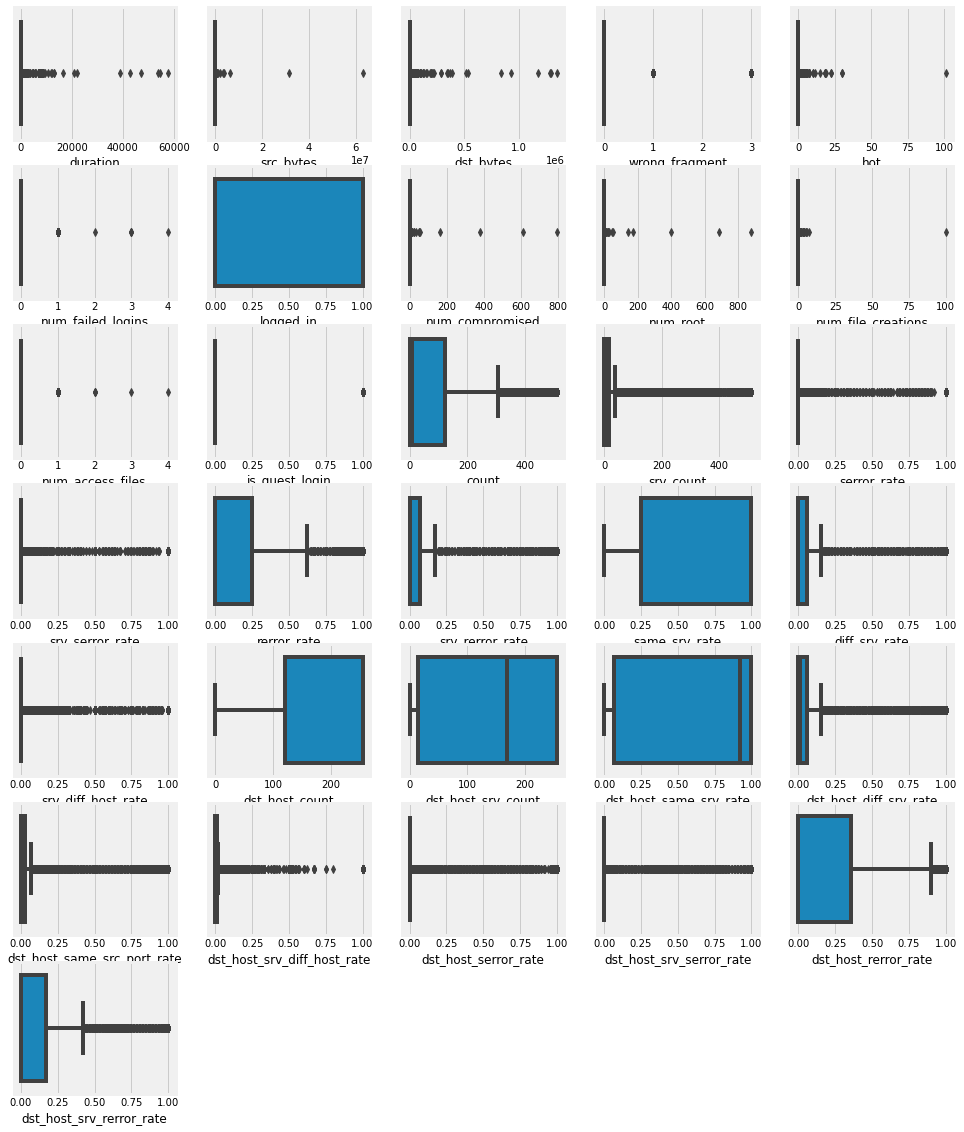

In [14]:
# find columns that containing outliers
print('find columns that containing outliers, graphical')
print('--'*60)

## removing all categorical and output label
columns = list(dframe_m2.drop(columns = ['protocol_type', 'service', 'flag', 'class']).columns)
box_plot_analysis(dframe_m2, (15,20), 7, 5, columns)

### Outlier calculation

In [15]:
def outliers_count(data):
    """
    This function counts outliers from the features.
    """
    q1 = data.quantile(0.25); q3 = data.quantile(0.75)
    IQR = q3 - q1  ## getting inter quartile range
    outliers = ((data.iloc[:] < (q1 - 1.5 * IQR)) | (data.iloc[:] > (q3 + 1.5 * IQR))).sum(axis = 0) ## getting outliers
    ## creating dataframe
    out_df = pd.DataFrame(outliers, index = data.columns, columns = ['Outliers Count'])
    ## getting percentage
    out_df['Percentage (%)'] = round(out_df['Outliers Count'] * 100 / data.shape[0], 2)  
    return out_df.sort_values(by="Outliers Count", ascending=False)

In [16]:
print('outlier count table for each feature using inter quartile range')
print('--'*60)

outliers_df = outliers_count(dframe_m2[columns])
outliers_df

outlier count table for each feature using inter quartile range
------------------------------------------------------------------------------------------------------------------------


Outliers Count  Percentage (%)
srv_rerror_rate                        5581           24.76
rerror_rate                            5365           23.80
dst_host_srv_rerror_rate               5219           23.15
srv_diff_host_rate                     4975           22.07
dst_host_serror_rate                   4615           20.47
dst_host_same_src_port_rate            4259           18.89
dst_bytes                              4001           17.75
dst_host_srv_serror_rate               3628           16.10
dst_host_srv_diff_host_rate            3610           16.02
dst_host_rerror_rate                   3573           15.85
duration                               3526           15.64
serror_rate                            3347           14.85
srv_serror_rate                        2913           12.92
src_bytes                              2732           12.12
srv_count                              2391           10.61
dst_host_diff_srv_rate                 2189            9.71
diff_srv_rate                          2059            9.13
count                                  1330            5.90
hot                                    1007            4.47
is_guest_login                          641            2.84
num_failed_logins                       478            2.12
num_compromised                         369            1.64
wrong_fragment                          100            0.44
num_access_files                         72            0.32
num_root                                 48            0.21
num_file_creations                       42            0.19
same_srv_rate                             0            0.00
dst_host_srv_count                        0            0.00
dst_host_same_srv_rate                    0            0.00
logged_in                                 0            0.00
dst_host_count                            0            0.00

- From outliers count we can say that, most of the features have almost one fourth outliers.
- As we are going to use random forest classifier which is immune to outliers, we may keep the outliers.

## 5. Exploratory Data Analysis (EDA)

### Target Label Analysis

In [17]:
colors = ['red', 'darkblue']
fig = px.pie(dframe_m2, names= "class", color_discrete_sequence=colors) ## pie plot for target data
fig.show()

### If the above chart is not visible, then you can refer to below chart

In [18]:
#from IPython.display import Image

- The output classifier is little bit imbalance with anomaly class as a majority class and normal class as a minority class.

## Univariate Analysis - Numerical data

### Density Analysis

In [19]:
def distribution_plot_analysis(data, size, num_row, num_col, columns):
    """
     Plot distribution for numerical features.
    """
    figure = plt.figure(figsize=size) ## setting up the size
    col_num = 1  ## starting the column number from 1
    ## iterating over column names
    for i in columns:
        plt.subplot(num_row, num_col, col_num) ## creating subplots
        plot = sns.distplot(data[i], color = "darkblue")  ## boxplot
        plt.xlabel(i, fontsize=12)   ## column label
        col_num += 1
    plt.show()

Density based analysis of numerical features, graphical
------------------------------------------------------------------------------------------------------------------------


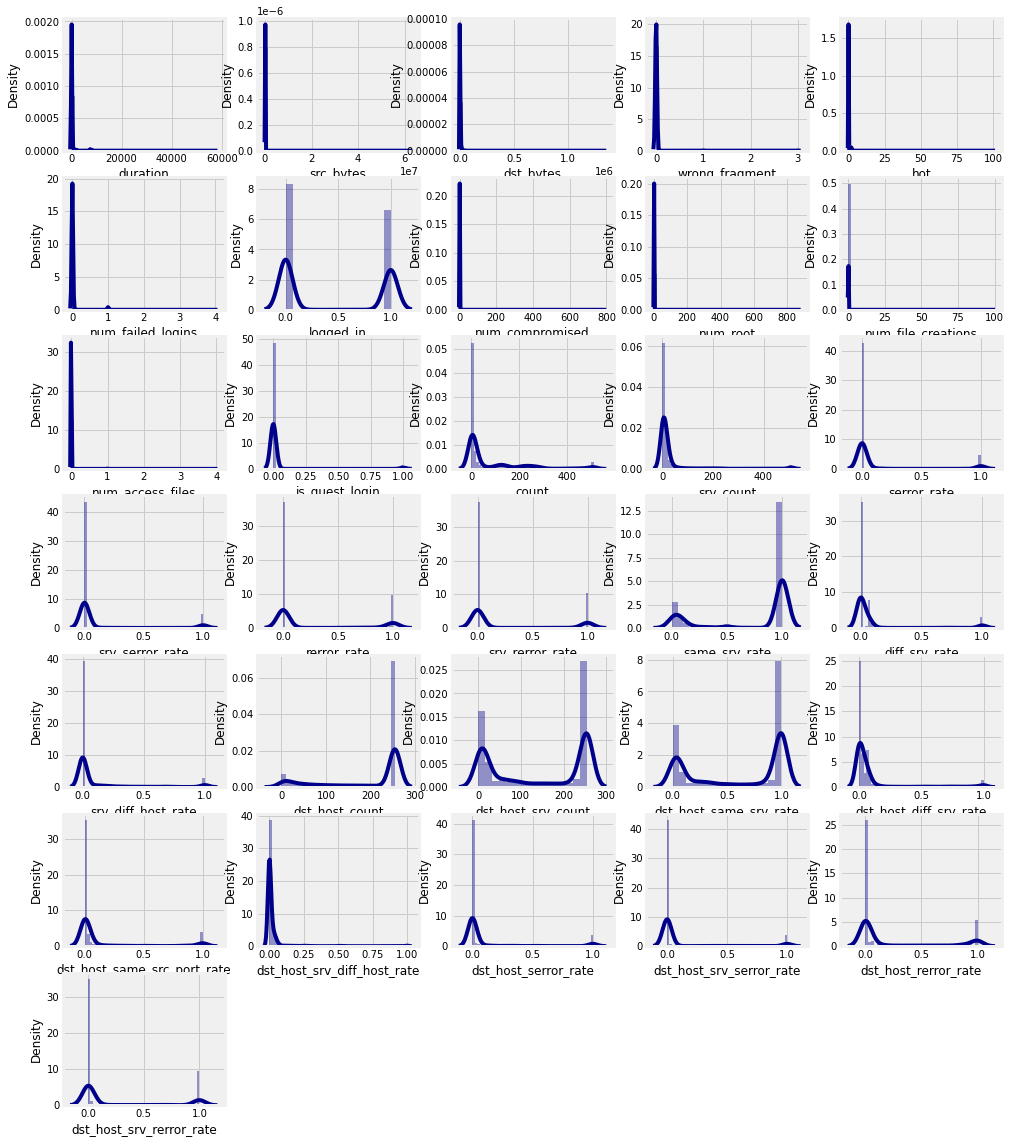

In [20]:
print('Density based analysis of numerical features, graphical')
print('--'*60)

## removing all categorical and output label
distribution_plot_analysis(dframe_m2, (15,20), 7, 5, columns)

### Density Analysis - Class Based

In [21]:
def distribution_plot_classbased(data, size, num_row, num_col, columns, out_col):
    """
    This function is to plot distribution plot for numerical features.
    """
    figure = plt.figure(figsize=size) ## setting up the size
    col_num = 1  ## starting the column number from 1
    ## iterating over column names
    for i in columns:
        plt.subplot(num_row, num_col, col_num) ## creating subplots
        sns.distplot(data[data[out_col] == "anomaly"][i], color = "darkblue")  ## boxplot
        sns.distplot(data[data[out_col] == "normal"][i], color = "red")  ## boxplot
        plt.xlabel(i, fontsize=12)   ## column label
        col_num += 1
    plt.show()

Density based analysis of numerical features class based, graphical
------------------------------------------------------------------------------------------------------------------------


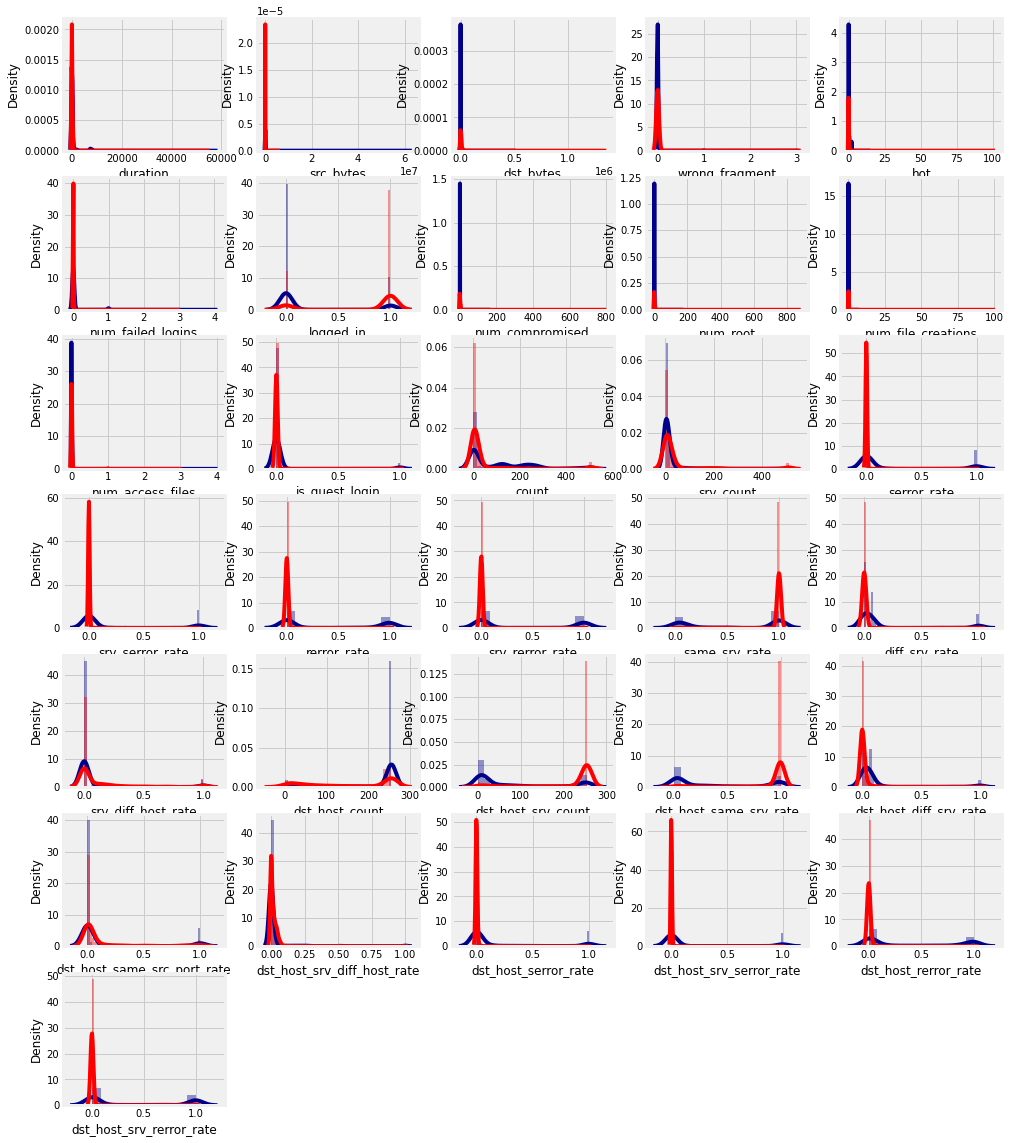

In [22]:
print('Density based analysis of numerical features class based, graphical')
print('--'*60)

## removing all categorical and output label
distribution_plot_classbased(dframe_m2, (15,20), 7, 5, columns, "class")

### Correlation Analysis

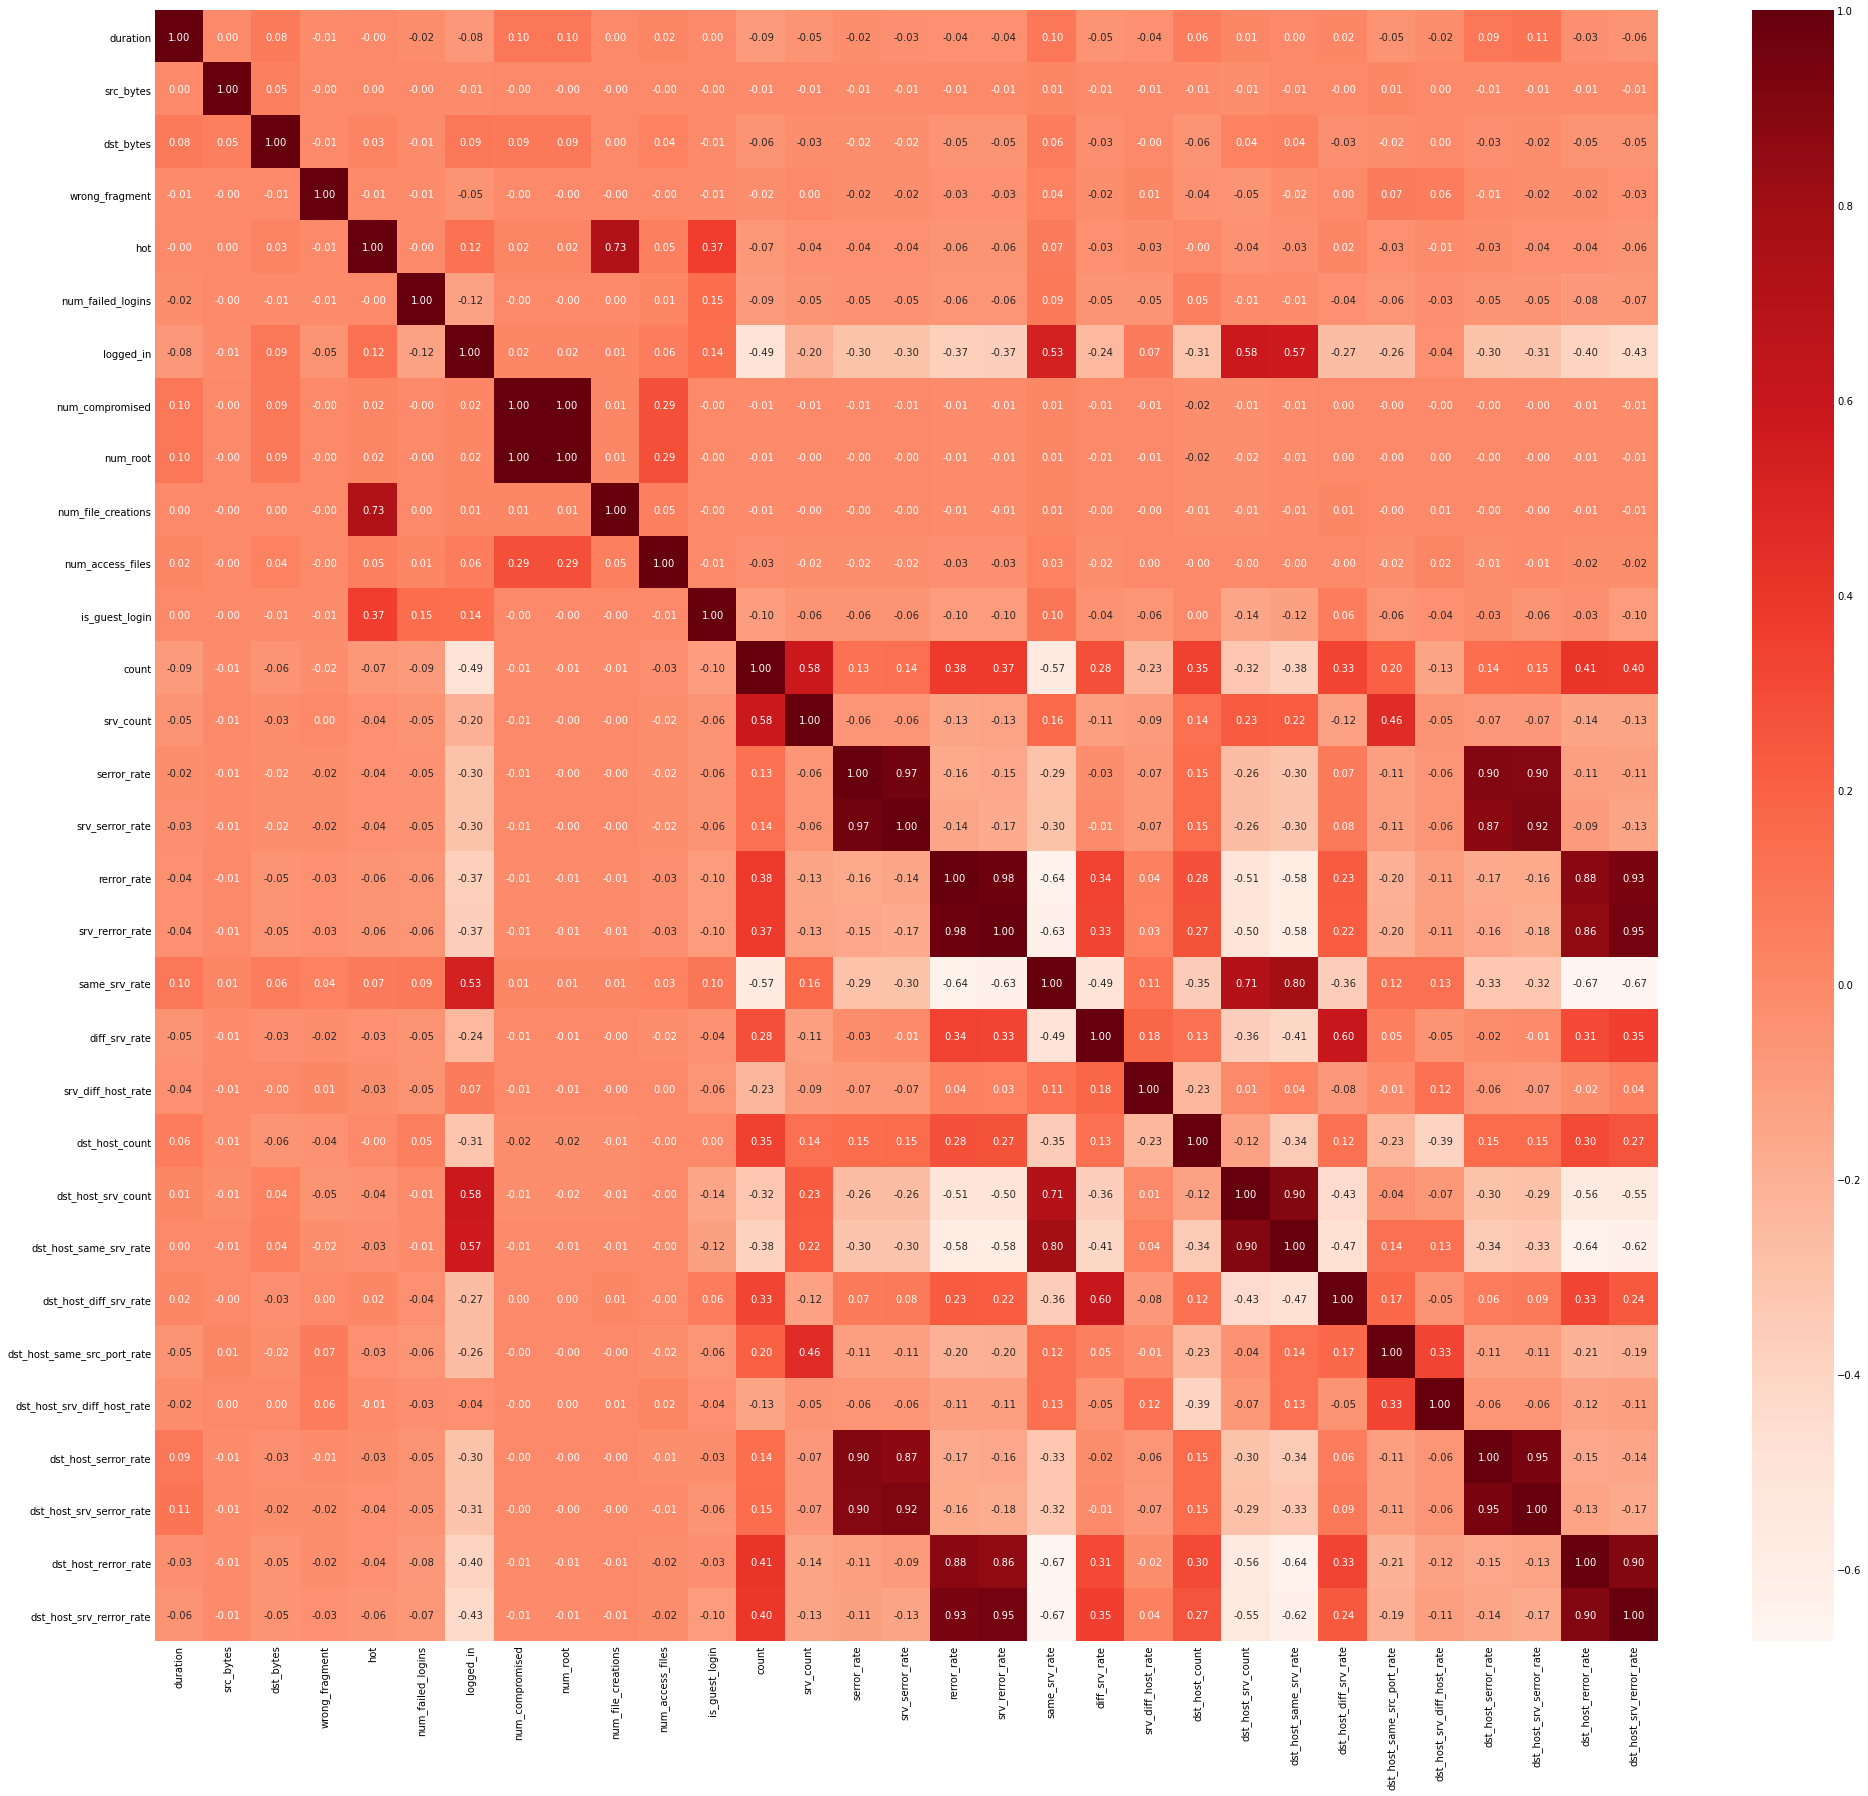

In [23]:
fig = plt.figure(figsize=(30,30)) #setting figure size
plot = sns.heatmap(dframe_m2.corr(method="pearson"), cmap="Reds", annot=True, fmt='.2f')
plt.show()

### Univariate analysis - Categorical Data

### Count Analysis

In [24]:
def count_plot_analysis(data, size, num_row, num_col, columns):
    """
     Plot count for categorical features.
    """
    figure = plt.figure(figsize=size) ## setting up the size
    col_num = 1  ## starting the column number from 1
    ## iterating over column names
    for i in columns:
        plt.subplot(num_row, num_col, col_num) ## creating subplots
        plot = data[i].value_counts().plot(kind="bar") ## boxplot
        plt.xlabel(i, fontsize=12)   ## column label
        col_num += 1
    plt.show()

Count based analysis of categorical features, graphical
----------------------------------------------------------------------------------------------------------------------------


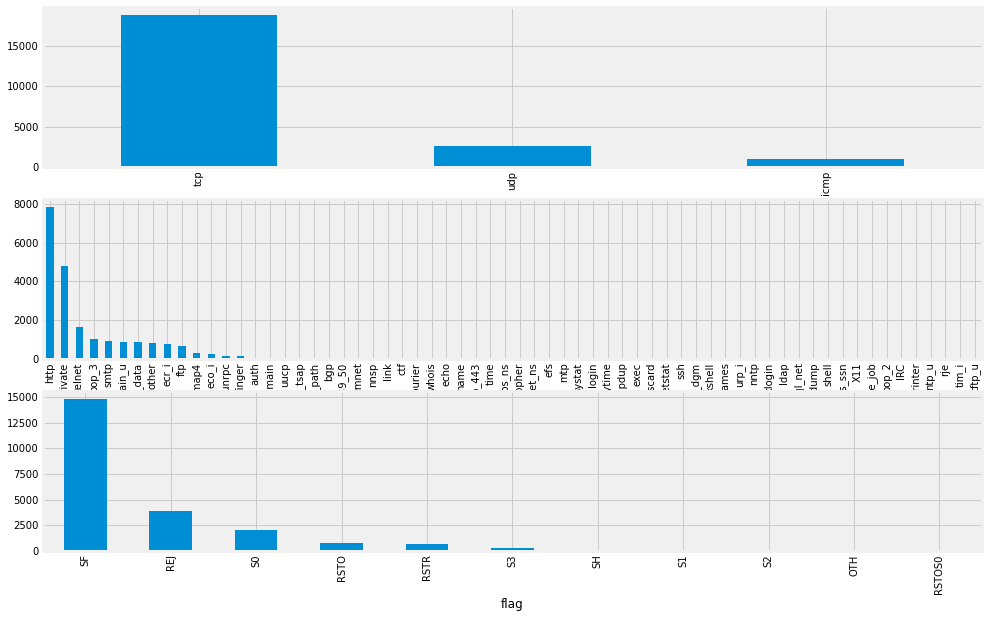

In [25]:
print('Count based analysis of categorical features, graphical')
print('--'*62)

## removing all categorical and output label
cat_cols = ["protocol_type", "service", "flag"]
count_plot_analysis(dframe_m2, (15,10), 3, 1, cat_cols)

### Count Analysis - Class based

In [26]:
def count_plot_classbased(dataframe, hue_col, col_on_analysis, figure_size=None):
    """
    This function generates countplot to check 
    """
    fig = plt.figure(figsize=figure_size)
    plot = sns.countplot(x= col_on_analysis, hue=hue_col, data=dataframe)
    plt.ylabel("Count", fontsize=15)
    plt.title("Count Plot Analysis of " + col_on_analysis +" with " + hue_col, fontsize=15)
    plt.show()

Count based analysis of categorical features class based, graphical
----------------------------------------------------------------------------------------------------------------------------


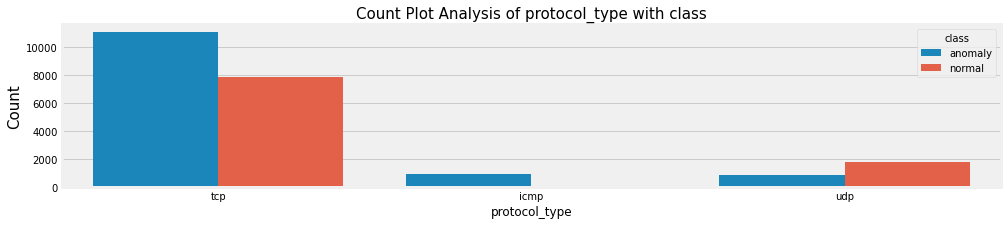

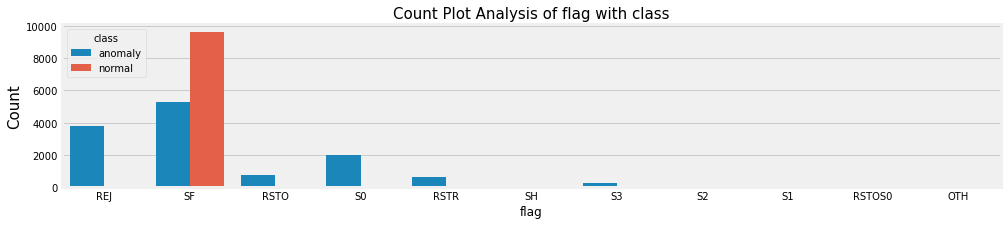

In [27]:
print('Count based analysis of categorical features class based, graphical')
print('--'*62)

for col in cat_cols[0::2]:
    count_plot_classbased(dframe_m2, "class", col, figure_size=(15,3))

## 6. Data Encoding

In [28]:
## converting categorical data into numbers
from sklearn.preprocessing import LabelEncoder


## copying the data into another dataframe
dframe_association = dframe_m2.copy(deep=True)

for col in cat_cols:
    enc = LabelEncoder()
    dframe_m2[col] = enc.fit_transform(dframe_m2[col])
    
## mapping output labels into binary values
dframe_m2["class_label"] = dframe_m2["class"].map({"anomaly" : 1, "normal" : 0})

In [29]:
dframe_m2.head(3)

duration  protocol_type  service  flag  src_bytes  dst_bytes  \
0         0              1       45     1          0          0   
1         0              1       45     1          0          0   
2         2              1       19     9      12983          0   

   wrong_fragment  hot  num_failed_logins  logged_in  ...  \
0               0    0                  0          0  ...   
1               0    0                  0          0  ...   
2               0    0                  0          0  ...   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.04   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.61                         0.02   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   1.0   
1                   0.0                       0.0                   1.0   
2                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate    class  class_label  
0                       1.0  anomaly            1  
1                       1.0  anomaly            1  
2                       0.0   normal            0  

[3 rows x 36 columns]

## 7. Feature Selection Techniques

### Variance Threshold method

In [30]:
from sklearn.feature_selection import VarianceThreshold

dframe_vt = dframe_m2.iloc[:,0:-1].select_dtypes(include=np.number)  ## getting only input features

#variance threshold method to select the features. 
vt = VarianceThreshold(threshold=0.15)
vt.fit(dframe_vt)
dframe_vthreshold = dframe_vt.iloc[:,vt.get_support()]

print("Shape of the dframe_vthreshold is {}.".format(dframe_vthreshold.shape))
dframe_vthreshold.head()

Shape of the dframe_vthreshold is (22541, 20).


duration  protocol_type  service  flag  src_bytes  dst_bytes  hot  \
0         0              1       45     1          0          0    0   
1         0              1       45     1          0          0    0   
2         2              1       19     9      12983          0    0   
3         0              0       13     9         20          0    0   
4         1              1       55     2          0         15    0   

   logged_in  num_compromised  num_root  num_file_creations  count  srv_count  \
0          0                0         0                   0    229         10   
1          0                0         0                   0    136          1   
2          0                0         0                   0      1          1   
3          0                0         0                   0      1         65   
4          0                0         0                   0      1          8   

   rerror_rate  srv_rerror_rate  same_srv_rate  dst_host_count  \
0          1.0              1.0           0.04           255.0   
1          1.0              1.0           0.01           255.0   
2          0.0              0.0           1.00           134.0   
3          0.0              0.0           1.00             3.0   
4          1.0              0.5           1.00            29.0   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_srv_rerror_rate  
0                10.0                    0.04                      1.00  
1                 1.0                    0.00                      1.00  
2                86.0                    0.61                      0.00  
3                57.0                    1.00                      0.00  
4                86.0                    0.31                      0.71

In [31]:
print("The top 8 features are : {}.".format(list(dframe_vthreshold.columns[0:8])))

The top 8 features are : ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'hot', 'logged_in'].


### Select K-Best method

In [32]:
from sklearn.feature_selection import SelectKBest,f_regression

sel = SelectKBest(f_regression, k=15)
sel.fit_transform(dframe_m2.iloc[:,0:-2], dframe_m2["class_label"].values)
dframe_kbest = dframe_m2.iloc[:,0:-2].iloc[:,sel.get_support()]

print("Shape of the df_vthreshold is {}.".format(dframe_kbest.shape))
dframe_kbest.head()

Shape of the df_vthreshold is (22541, 15).


service  flag  logged_in  serror_rate  srv_serror_rate  rerror_rate  \
0       45     1          0          0.0             0.00          1.0   
1       45     1          0          0.0             0.00          1.0   
2       19     9          0          0.0             0.00          0.0   
3       13     9          0          0.0             0.00          0.0   
4       55     2          0          0.0             0.12          1.0   

   srv_rerror_rate  same_srv_rate  dst_host_count  dst_host_srv_count  \
0              1.0           0.04           255.0                10.0   
1              1.0           0.01           255.0                 1.0   
2              0.0           1.00           134.0                86.0   
3              0.0           1.00             3.0                57.0   
4              0.5           1.00            29.0                86.0   

   dst_host_same_srv_rate  dst_host_serror_rate  dst_host_srv_serror_rate  \
0                    0.04                   0.0                       0.0   
1                    0.00                   0.0                       0.0   
2                    0.61                   0.0                       0.0   
3                    1.00                   0.0                       0.0   
4                    0.31                   0.0                       0.0   

   dst_host_rerror_rate  dst_host_srv_rerror_rate  
0                  1.00                      1.00  
1                  1.00                      1.00  
2                  0.00                      0.00  
3                  0.00                      0.00  
4                  0.83                      0.71

In [33]:
print("The top 8 features are : {}.".format(list(dframe_kbest.columns[0:8])))

The top 8 features are : ['service', 'flag', 'logged_in', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate'].


* Both the feature selection method is robust and has almost similar features in both the dataset.
* This means they both value the features which is important interms of output

## 8.Data Splitting 

In [34]:
from sklearn.model_selection import train_test_split

y = dframe_m2["class_label"].values ## output data
X = dframe_m2.drop(columns = ["class", "class_label"])

## splitting of data for variance threshold model
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((16905, 34), (5636, 34), (16905,), (5636,))

## 9. Functions to plot roc-auc curve along with confusion matrix

In [35]:
def roc_auc_curve_plot(model, xtrain, xtest, ytrain, ytest):
    """
    Plots the roc_auc curve between training and testing data.
    """
    ## output prediction
    ypred_tr = model.predict(xtrain); ypred_te = model.predict(xtest)
    ## roc auc curve
    fpr_tr, tpr_tr, threshold_tr = metrics.roc_curve(ytrain, ypred_tr); roc_auc_tr = metrics.auc(fpr_tr, tpr_tr)
    fpr_te, tpr_te, threshold_te = metrics.roc_curve(ytest, ypred_te); roc_auc_te = metrics.auc(fpr_te, tpr_te)
    
    ## plot
    fig, ax = plt.subplots(ncols=2, figsize=(15,5))
    
    ## plot curve
    ax[0].set_title('Receiver Operating Characteristic Curve', fontsize=20)
    ax[0].plot(fpr_tr, tpr_tr, 'b', label = 'train_auc = %0.2f' % roc_auc_tr)
    ax[0].plot(fpr_te, tpr_te, 'g', label = 'test_auc = %0.2f' % roc_auc_te)
    ax[0].legend(loc = 'lower right')
    ax[0].plot([0, 1], [0, 1],'r--')
    ax[0].set_xlim([0, 1]); ax[0].set_ylim([0, 1])
    ax[0].set_ylabel('True Positive Rate'); ax[0].set_xlabel('False Positive Rate')
    
    ## plot confusion matrix
    plot = sns.heatmap(metrics.confusion_matrix(ytest, ypred_te), cmap="Blues", annot=True, fmt='.0f', ax=ax[1])
    ax[1].set_xlabel("Predicted Label", fontsize=15)
    ax[1].set_ylabel("Actual Label", fontsize=15)
    ax[1].set_title("Confusion Matrix", fontsize=20)
    
    plt.show()
    return ypred_tr, ypred_te

In [36]:
def scores(ytrain_actual, ytrain_predicted, ytest_Actual, ytest_predicted):
    """
    This function yields the output f1score, accuracy, precision and recall scores.
    """
    ## output scores
    acc_train = metrics.accuracy_score(ytrain_actual, ytrain_predicted)
    acc_test = metrics.accuracy_score(ytest_Actual, ytest_predicted)
    f1score = metrics.f1_score(ytest_Actual, ytest_predicted)
    precision = metrics.precision_score(ytest_Actual, ytest_predicted)
    recall = metrics.recall_score(ytest_Actual, ytest_predicted)
    classification_report = metrics.classification_report(ytest_Actual, ytest_predicted)
    
    return acc_train, acc_test, f1score, precision, recall, classification_report

## 10. Random Forest

## High level Description
Random forest is called random due to :

   1.random sampling of train data when building the tree
   
   2.Random subset of input features when splitting at nodes

 Randomisation will make look the decision tree less correlated, so that generalization error of ensemble can be improved.

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best cross-validation score: 0.99
Best parameters:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}


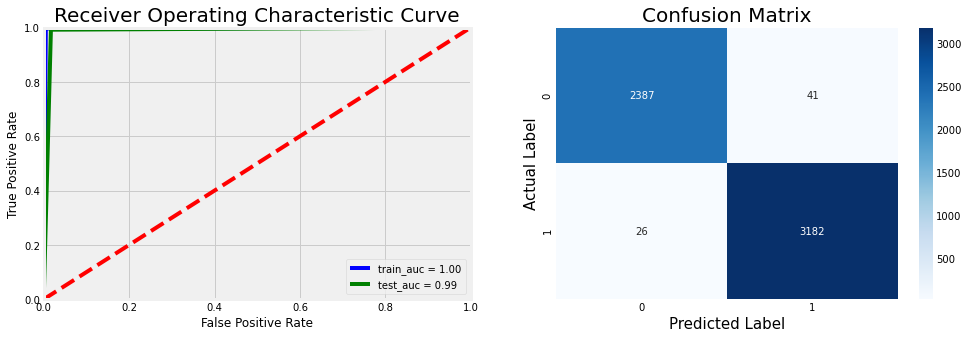


acc_score, f1_score, precision and recall for test dataset are 0.9881, 0.9896, 0.9873, and 0.9919 respectively.

Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2428
           1       0.99      0.99      0.99      3208

    accuracy                           0.99      5636
   macro avg       0.99      0.99      0.99      5636
weighted avg       0.99      0.99      0.99      5636



In [37]:
from sklearn.ensemble import RandomForestClassifier

parameters_ = {'max_depth': range(5,16,2), 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}  ## parameter grids
rf_clf = RandomForestClassifier(n_estimators = 100, max_features='sqrt', bootstrap=True, random_state = 42, n_jobs=-1)


## grid search cv
clf = GridSearchCV(rf_clf, parameters_, cv=5, scoring='f1', return_train_score=True, verbose=True, 
                   n_jobs=-1).fit(xtrain, ytrain)

## getting the best scores
print("Best cross-validation score: {:.2f}".format(clf.best_score_))
print("Best parameters: ", clf.best_params_)

rf_clf = RandomForestClassifier(max_depth = clf.best_params_['max_depth'],
                                min_samples_split = clf.best_params_['min_samples_split'],
                                min_samples_leaf = clf.best_params_['min_samples_leaf'],
                                n_estimators = 100, max_features='sqrt', bootstrap=True, random_state = 42, 
                                n_jobs=-1).fit(xtrain, ytrain) ## training with optimal value

## roc auc curve, confusion matrix with output prediction
ypred_tr_m1, ypred_te_m1 = roc_auc_curve_plot(rf_clf, xtrain, xtest, ytrain, ytest)
acc_train_m1, acc_test_m1, f1_m1, precision_m1, recall_m1, classification_report_m1 = scores(ytrain, ypred_tr_m1, 
                                                                                             ytest, ypred_te_m1)
## accuracy scores
print("\nacc_score, f1_score, precision and recall for test dataset are {:.4f}, {:.4f}, {:.4f}, and {:.4f} respectively.\n".
      format(acc_test_m1, f1_m1, precision_m1, recall_m1))

## getting pass and fail individual class report
pass_data = classification_report_m1.split("\n")[2].split("      ")
fail_data = classification_report_m1.split("\n")[3].split("      ")

print("Classification Report :\n",classification_report_m1)

In [38]:
train_accuracy = list(); test_accuracy = list(); pass_class_pre = list(); fail_class_pre = list()
pass_class_rec = list(); fail_class_rec = list(); pass_class_f1 = list(); fail_class_f1 = list()
overall_f1 = list(); overall_pre = list(); overall_rec = list(); method = list()

## appending method names
method.append("Random Forest")
train_accuracy.append(acc_train_m1); test_accuracy.append(acc_test_m1)
pass_class_pre.append(pass_data[2].strip()); fail_class_pre.append(fail_data[2].strip())
pass_class_rec.append(pass_data[3].strip()); fail_class_rec.append(fail_data[3].strip())
pass_class_f1.append(pass_data[4].strip()); fail_class_f1.append(fail_data[4].strip())
overall_f1.append(f1_m1); overall_pre.append(precision_m1); overall_rec.append(recall_m1)

## 11. Association rules

## High Level Description

Apriori works on BFS i.e all itemsets have the same size at same level.

If an itemset is frequent all of its subsets are also frequent. Similarly if an itemset is infrequent, then all of its immediate supersets must also be infrequent.

Apriori follows monotonicity principle.

In [39]:
from mlxtend.preprocessing import TransactionEncoder

## selecting optimal columns to feed into apriori algorithm
dframe_temp = dframe_association[["protocol_type","service","flag", "class"]]
dframe_temp = dframe_temp.values

enc = TransactionEncoder() ## initializing encoder
apriori_data = enc.fit(dframe_temp).transform(dframe_temp) ## fitting and transforming using transaction encoder
apriori_df = pd.DataFrame(apriori_data, columns=enc.columns_)  ## creating dataframe with 0,1, True and False values
apriori_df = apriori_df.replace(False,0)
apriori_df

IRC OTH   REJ  RSTO RSTOS0 RSTR S0 S1 S2 S3  ... telnet tftp_u tim_i  \
0       0   0  True     0      0    0  0  0  0  0  ...      0      0     0   
1       0   0  True     0      0    0  0  0  0  0  ...      0      0     0   
2       0   0     0     0      0    0  0  0  0  0  ...      0      0     0   
3       0   0     0     0      0    0  0  0  0  0  ...      0      0     0   
4       0   0     0  True      0    0  0  0  0  0  ...   True      0     0   
...    ..  ..   ...   ...    ...  ... .. .. .. ..  ...    ...    ...   ...   
22536   0   0     0     0      0    0  0  0  0  0  ...      0      0     0   
22537   0   0     0     0      0    0  0  0  0  0  ...      0      0     0   
22538   0   0     0     0      0    0  0  0  0  0  ...      0      0     0   
22539   0   0     0     0      0    0  0  0  0  0  ...      0      0     0   
22540   0   0  True     0      0    0  0  0  0  0  ...      0      0     0   

      time   udp urp_i uucp uucp_path vmnet whois  
0        0     0     0    0         0     0     0  
1        0     0     0    0         0     0     0  
2        0     0     0    0         0     0     0  
3        0     0     0    0         0     0     0  
4        0     0     0    0         0     0     0  
...    ...   ...   ...  ...       ...   ...   ...  
22536    0     0     0    0         0     0     0  
22537    0     0     0    0         0     0     0  
22538    0     0     0    0         0     0     0  
22539    0  True     0    0         0     0     0  
22540    0     0     0    0         0     0     0  

[22541 rows x 80 columns]

In [40]:
from mlxtend.frequent_patterns import apriori, association_rules

## assigning support values with itemset using apriori algorithm
apriori_df_ext = apriori(apriori_df, min_support = 0.2, use_colnames = True, verbose = 1)
apriori_df_ext

Processing 4 combinations | Sampling itemset size 4


support                 itemsets
0   0.659909                     (SF)
1   0.569185                (anomaly)
2   0.348387                   (http)
3   0.430815                 (normal)
4   0.211792                (private)
5   0.837452                    (tcp)
6   0.233707            (anomaly, SF)
7   0.308327               (SF, http)
8   0.426201             (SF, normal)
9    0.49736                (SF, tcp)
10  0.489552           (anomaly, tcp)
11  0.296038           (http, normal)
12  0.348387              (http, tcp)
13  0.347899            (normal, tcp)
14   0.29453       (SF, http, normal)
15  0.308327          (SF, http, tcp)
16  0.343286        (SF, normal, tcp)
17  0.296038      (tcp, http, normal)
18   0.29453  (SF, http, tcp, normal)

In [41]:
## creating association rule

asscociation_df = association_rules(apriori_df_ext, metric = "confidence", min_threshold = 0.2)
asscociation_df.sort_values(by = "confidence", ascending=False)

antecedents          consequents  antecedent support  \
22           (SF, http)                (tcp)            0.308327   
36       (http, normal)                (tcp)            0.296038   
41   (SF, http, normal)                (tcp)            0.294530   
12               (http)                (tcp)            0.348387   
43  (normal, http, tcp)                 (SF)            0.296038   
18       (http, normal)                 (SF)            0.296038   
48       (http, normal)            (SF, tcp)            0.296038   
5              (normal)                 (SF)            0.430815   
30        (normal, tcp)                 (SF)            0.347899   
44           (SF, http)        (normal, tcp)            0.308327   
40      (SF, http, tcp)             (normal)            0.308327   
16           (SF, http)             (normal)            0.308327   
26               (http)            (SF, tcp)            0.348387   
24          (http, tcp)                 (SF)            0.348387   
3                (http)                 (SF)            0.348387   
8             (anomaly)                (tcp)            0.569185   
42    (SF, normal, tcp)               (http)            0.343286   
35        (normal, tcp)               (http)            0.347899   
10               (http)             (normal)            0.348387   
34          (http, tcp)             (normal)            0.348387   
38               (http)        (normal, tcp)            0.348387   
49        (normal, tcp)           (SF, http)            0.347899   
51               (http)    (SF, normal, tcp)            0.348387   
47          (http, tcp)         (SF, normal)            0.348387   
20               (http)         (SF, normal)            0.348387   
14             (normal)                (tcp)            0.430815   
28         (SF, normal)                (tcp)            0.426201   
32             (normal)            (SF, tcp)            0.430815   
6                  (SF)                (tcp)            0.659909   
17         (SF, normal)               (http)            0.426201   
46         (SF, normal)          (http, tcp)            0.426201   
29            (SF, tcp)             (normal)            0.497360   
39             (normal)          (http, tcp)            0.430815   
11             (normal)               (http)            0.430815   
53             (normal)      (SF, http, tcp)            0.430815   
21             (normal)           (SF, http)            0.430815   
4                  (SF)             (normal)            0.659909   
23            (SF, tcp)               (http)            0.497360   
7                 (tcp)                 (SF)            0.837452   
45            (SF, tcp)       (http, normal)            0.497360   
9                 (tcp)            (anomaly)            0.837452   
31                 (SF)        (normal, tcp)            0.659909   
25                 (SF)          (http, tcp)            0.659909   
2                  (SF)               (http)            0.659909   
50                 (SF)  (normal, http, tcp)            0.659909   
19                 (SF)       (http, normal)            0.659909   
13                (tcp)               (http)            0.837452   
15                (tcp)             (normal)            0.837452   
0             (anomaly)                 (SF)            0.569185   
33                (tcp)         (SF, normal)            0.837452   
27                (tcp)           (SF, http)            0.837452   
1                  (SF)            (anomaly)            0.659909   
37                (tcp)       (http, normal)            0.837452   
52                (tcp)   (SF, http, normal)            0.837452   

    consequent support   support  confidence      lift  leverage  conviction  
22            0.837452  0.308327    1.000000  1.194099  0.050118         inf  
36            0.837452  0.296038    1.000000  1.194099  0.048121         inf  
41            0.837452  0.294530  

### Observation:

- The association rule gives us an idea about how the categories are distributed with respect to output and other feature.
- As we can see SF along with http has the highest combination with tcp.

## 12. Conclusion 

In [42]:
compare = np.vstack((method, train_accuracy, test_accuracy,
                    pass_class_pre, pass_class_rec, pass_class_f1, 
                    fail_class_pre, fail_class_rec, fail_class_f1,
                    overall_pre, overall_rec, overall_f1)).T
compare_df = pd.DataFrame(compare, columns = ["METHOD", "TRAIN_ACCURACY", "TEST_ACCURACY",
                                             "Anomaly_PRECISION", "Anomaly_RECALL", "Anomaly_F1SCORE",
                                             "Normal_PRECISION", "Normal_RECALL", "Normal_F1SCORE",
                                             "OVERALL_PRECISION", "OVERALL_RECALL", "OVERALL_F1_SCORE"])

for col in compare_df.columns[3:]:
    compare_df[col] = compare_df[col].astype("float")

compare_df.round(2)

METHOD      TRAIN_ACCURACY       TEST_ACCURACY  Anomaly_PRECISION  \
0  Random Forest  0.9957409050576752  0.9881121362668559               0.99   

   Anomaly_RECALL  Anomaly_F1SCORE  Normal_PRECISION  Normal_RECALL  \
0            0.98             0.99              0.99           0.99   

   Normal_F1SCORE  OVERALL_PRECISION  OVERALL_RECALL  OVERALL_F1_SCORE  
0            0.99               0.99            0.99              0.99

* From above random forest algorithm output we can say that, the model is performing well and giving almost 100% as accuracy. 
* This means model is able to distinguish the ouptut classes properly.